#Subsetting

In this lesson we will learn different methods to select data from a pandas.DataFrame. Like it’s often the case when working with the pandas package, there are many ways in which we can subset a data frame. Here we will review the core methods to do this.

## Read in CSV

To read in a CSV file into our Python workspace as pandas.DataFrame we use the pandas.read_csv function:

In [1]:
import pandas as pd

# Read in file, argument is the file path
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Print data frame's first five rows 
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


Birds surveyed in four wetlands:

- Carp salt marsh (CSM)
- Mugu Lagoon (MUL)
- San Dieguito Wetland (SDW)
- Tijuana Estuary (TJE)

The values from the second column to the last column correspond to the number of different bird species recorded across the survey sites in each wetland during winter, spring, and fall of a given year. 2010-2023.

In [2]:
# Print data frame's column names
df.columns

Index(['year', 'CSM_winter', 'CSM_spring', 'CSM_fall', 'MUL_winter',
       'MUL_spring', 'MUL_fall', 'SDW_winter', 'SDW_spring', 'SDW_fall',
       'TJE_winter', 'TJE_spring', 'TJE_fall'],
      dtype='object')

In [3]:
# List the data types of each column
df.dtypes

year            int64
CSM_winter    float64
CSM_spring    float64
CSM_fall      float64
MUL_winter    float64
MUL_spring    float64
MUL_fall      float64
SDW_winter    float64
SDW_spring    float64
SDW_fall      float64
TJE_winter    float64
TJE_spring    float64
TJE_fall      float64
dtype: object

In [4]:
# Print data frame's shape: output is a tuple (# rows, # columns)
df.shape

(14, 13)

## Selecting a single column

Selecting a single column by column name is the simplest case for selecting data in a data frame. The genereal syntax to do this is:

```python
df['column_name']
```

Notice the column name is given as string inside the square brackets. This is an example of **label-based subsetting***, which means we want to select data from our data frame using the names of the columns, not their position. When we select rows or column using their position, we are doing **position-based subsetting**. We’ll see some methods to do this when we move into selecting rows.

## Example

Suppose we are interested in the number of bird species observed at the Mugu Lagoon in spring. We can access that single column in this way:

In [5]:
# Select a single column by using square brackets []
mul_spring = df['MUL_spring']

# Print first five elements in this column
mul_spring.head()

0     NaN
1    52.0
2    58.0
3    58.0
4    52.0
Name: MUL_spring, dtype: float64

In [6]:
# Check the type of the ouput
print(type(mul_spring))

<class 'pandas.core.series.Series'>


Remember we can think of a pandas.DataFrame as a dictionary of its columns? Then we can access a single column using the column name as the *key*, just like we would do in a dictionary. That is the we just used: df['column_name'].

`df.column_name`

We can also do label-based subsetting of a single column using attribute syntax:

```python
df.column_name
```

Example:

In [7]:
df.MUL_spring.head()

0     NaN
1    52.0
2    58.0
3    58.0
4    52.0
Name: MUL_spring, dtype: float64

In general, it is better to use the df['column_name'] syntax. A couple reasons why are:

- df['column_name'] can take in any column name, while df.column_name only works if the column name has no spaces or special characters

- df['column_name'] avoids conflicts with pd.DataFrame methods and attributes. For example, if df has a column named count, it’s ambiguous whether pd.count is referring to the count() method or the count column.

## Selecting multiple columns using a list of column names

We can select multiple columns in a single call by passing a list with the column names to the square brackets []:

```python
df[['column_1', 'column_10', 'column_245']]
```

Notice there are double square brackets. This is because we are passing the list of names ['column_1', 'column_10', 'column_245'] to the selection brackets []. 

Example:

If we want to look at the species in the Tijuana Estuary during winter and fall, then we can select these columns like this:

In [8]:
# Select columns with names "TJE_winter" and "TJE_fall"
tje_wf = df[['TJE_winter','TJE_fall']]
tje_wf

,TJE_winter,TJE_fall
0,NaN,81.0
1,67.0,NaN
2,70.0,69.0
3,69.0,64.0
4,60.0,62.0
5,73.0,64.0
6,76.0,58.0
7,72.0,57.0
8,66.0,55.0
9,63.0,50.0


## Select using a slice

To select a slice of the columns we will use a special case of **loc** selection (we’ll cover the general one by the end of the lesson). The syntax will be:

```python
df.loc[ : , 'column_start':'column_end']
```

where `column_start` and `column_end` are, respectively, the starting point and endpoint of the column slice we want to subset from the data frame.

Notice two things:

- the first value passed to loc is used for selecting rows, using a colon : as the row-selection parameter means “select all the rows”

- the slice of the data frame we’ll obtain includes both endpoints of the slice 'column_start':'column_end'. In other words, we’ll get the column_start column and the column_end column. This is different from how slicing works in base Python and NumPy, where the endpoint is not included.

Example:

Let’s select the slice of columns that covers all data from Carpinteria Salt Marsh and Mugu Lagoon. This corresponds to all columns between CSM_winter and MUL_fall.

In [9]:
# Select columns between 'CSM_winter' and 'MUL_fall'
csm_mul = df.loc[:,'CSM_winter':'MUL_fall']
csm_mul.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall
0,39.0,40.0,50.0,45.0,NaN,61.0
1,48.0,44.0,NaN,58.0,52.0,NaN
2,51.0,43.0,49.0,57.0,58.0,53.0
3,42.0,46.0,38.0,60.0,58.0,62.0
4,38.0,43.0,45.0,49.0,52.0,57.0


## Selecting rows…
Now that we are familiar with some methods for selecting columns, let’s move on to selecting rows.

### … using a condition
Selecting rows that satisfy a particular condition is one of the most usual kinds of row subsetting. The general syntax for this type of selection is:

```python
df[condition_on_rows]
```

That condition_of_rows can be a myriad things, let’s see some usual scenarios.

Example:

Suppose we are intersted in all data after 2020. We can select these rows in this way:

In [10]:
# Select all rows with year > 2020
post_2020 = df[df['year']>2020]
post_2020

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


Let’s break down what is happening here. 

The condition for our rows is df['year']>2020. 

This is a pandas.Series with booooooooolean values (`True` or `False`) indicating which rows satisfy the condition year>2020:

In [11]:
# Check the type of df['year']>1996
print(type(df['year']>2020))

# Print the boolean series
df['year']>2020

<class 'pandas.core.series.Series'>


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
Name: year, dtype: bool

When we pass such a series of boolean values to the selection brackets [] we keep only the rows that correspond to a True value.

Get the subset of the data frame on which the San Dieguito Wetland has at least 75 species recorded during spring.



In [12]:
sdw_spring = df[df['SDW_spring']>=75]
sdw_spring

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


## **Example:**

Suppose we want to look at data from years 2012 to 2015 (including both years). 

One way of doing this is to use the between operator in our condition:

In [13]:
subset = df[df['year'].between(2012, 2015)]
subset

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0
5,2015,44.0,42.0,45.0,58.0,50.0,51.0,71.0,61.0,65.0,73.0,76.0,64.0


1. df['year'] is the column with the year values, a pandas.Series

2. in df['year'].between(), we have that between is a method for the pandas.Series and we are calling it using the dot .

3. (2012, 2015) are the parameters for the between() method, from the pandas documentation we can see this method will subset including both endpoints

4. df['year'].between(2012, 2015) is then a pandas.Series of boolean values indicating which rows have year equal to 2012, 2013, 2014, or 2015.

5. when we put df['year'].between(2012, 2015) inside the selection brackets [] we obtain the rows of the data frame with year equal to 2012, …, 2015.

## Avoid using `loc` for selecting only rows

It is equivalent to write:

In [14]:
# Select rows with year<2015
df[df['year']<2015]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


In [15]:
#and

#Select rows with year<2015 using loc
df.loc[ df['year']<2015 , :]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


In the second one:

- we are using the df.loc[ row-selection , column-selection] syntax

- the row-selection parameter is the condition df['year']<2015

- the column-selection parameter is a colon :, which indicates we want all columns for the rows we are selecting.

We prefer the first syntax when we are selecting rows and not columns since it is simpler.

## … using multiple conditions

We can combine multipe conditions to select rows by surrounding each one in parenthesis () and using the or operator | and the and operator &.

Example: or

Let’s select rows in which the Carpinteria Salt Marsh has more than 50 species registered in winter or fall:

In [16]:
df[ (df['CSM_winter']>50) | (df['CSM_fall']>50) ]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


## Example: and

Let’s select rows in which both the Carpinteria Salt Marsh and the San Dieguito Wetland have more than 60 reported bird species during spring:

In [17]:
df[ (df['CSM_spring']>60) & (df['SDW_spring']>60) ]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall


An empty data frame! That’s ok, it just means there are no rows that satisfy the given condition.

## … by position

All the selections we have done so far have been using labels. Sometimes we may want to select certain rows depending on their actual position in the data frame. In other words, using position-based subsetting. To do this, we use iloc selection with the syntax

`df.iloc[row-indices]`

iloc stands for integer location based indexing.

## Example

In [19]:
 # Select the fifth row (index=4)
    
df.iloc[4]

year          2014.0
CSM_winter      38.0
CSM_spring      43.0
CSM_fall        45.0
MUL_winter      49.0
MUL_spring      52.0
MUL_fall        57.0
SDW_winter      61.0
SDW_spring      78.0
SDW_fall        71.0
TJE_winter      60.0
TJE_spring      81.0
TJE_fall        62.0
Name: 4, dtype: float64

In [20]:
# Select rows 9 through 13, inclduing 13

df.iloc[9:14]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
9,2019,39.0,39.0,40.0,57.0,52.0,53.0,54.0,55.0,53.0,63.0,54.0,50.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


Notice that, since we are back to indexing by position, the right endpoint of the slice is not included in the ouput.

## Selecting rows and columns simultaneously…

Selecting rows and columns simultaneously can be done using loc (labels) or iloc (positions).

## …by labels or conditions

When we want to select rows and columns simultaneously by labels (including using conditions) we can use loc selection with the syntax

`df.loc[ row-selection, column-selection]`

specifying both paratmers: `row-selection` and `column-selection`. These parameters can be a condition or a subset of labels from the index or the column names.

## Example

Let’s select the winter surveys for Mugu Lagoon and the Tijuana Estuary after 2020:

In [21]:
df.loc[df['year']>2020, ['MUL_winter','TJE_winter']]

,MUL_winter,TJE_winter
11,54.0,53.0
12,60.0,60.0
13,72.0,60.0


Let’s break down this code:

- we are using the df.loc[ row-selection , column-selection] syntax

- the row-selection parameter is the condition df['year']>2020, which is a boolean array saying which years are greater than 2020

- the column-selection parameter is ['MUL_winter','TJE_winter'], which is a list with the names of the two columns we are interested in.

## … by position

When we want to select rows and columns simultaneously by position we use iloc selection with the syntax:

`df.iloc[ row-indices , column-indices]`

## Example

Suppose we want to select rows 3-7 (including 7) and columns 3 and 4:

In [22]:
df.iloc[ 3:8, [3,4]]

,CSM_fall,MUL_winter
3,38.0,60.0
4,45.0,49.0
5,45.0,58.0
6,47.0,63.0
7,43.0,57.0


Let’s break it down:

- we are using the df.iloc[ row-indices , column-indices] syntax to select by position

- the row-indices parameter is the slice of integer indices 3:8. Remember the right endpoint (8) won’t be included.

- the column-indices parameter is the list of integer indices 3 and 4. This means we are selecting the fourth and fifth column.

## iloc vs. loc: which one does what?

At the beginning, the difference between iloc and loc can be confusing. Remember the i in iloc stands for integer location, this reminds us iloc only uses integer indexing to retrieve information from the data frames in the same way as indexing for Python lists.

If you want to dive deeper, this is a great discussion about the difference between iloc and loc: Stackoverflow - How are iloc and loc different?

And, as always, the documentation will provide you with more information: pandas.DataFrame.loc and pandas.DataFrame.iloc.

##  iloc for column selection? Avoid it!

We can also access columns by position using iloc - but it is best not to if possible.

Suppose we want to access the 9th column in the data frame - then we want to select a column by position. In this case, the 9th column is the data at San Dieguito Wetland during spring and the 9th position corresponds to the index 8. We can select this column by position using the iloc selection:

```python
# Select column by position using iloc
# The syntax is iloc[row-indices, column-indices]
# [:,8] means "select all rows from the 8th column"
sdw_spring = df.iloc[:,8]
sdw_spring.head()
```

0    75.0
1    74.0
2    72.0
3    70.0
4    78.0
Name: SDW_spring, dtype: float64


Unless you are *really* looking for information about the 9th column, do not access a column by position. This is bound to break in many ways:

- it relies on a person correctly counting the position of a column. Even with a small dataset this can be prone to error.

- it is not explicit: if we want information about San Dieguito Wetland during spring, df.SDW_spring or df['SDW_spring'] are explicitely telling us we are accessing that information. df.iloc[:,8] is obscure and uninformative.

- datastets can get updated. Maybe a new column was added before SDW_spring, this would change the position of the column, which would make any code depending on df.iloc[:,8] invalid.

**Accessing columns by labels helps reproducibility!**

# Week 2 check in practice!!!


Check-in #1 

Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

<AxesSubplot:xlabel='Year', ylabel='Number of Observations'>

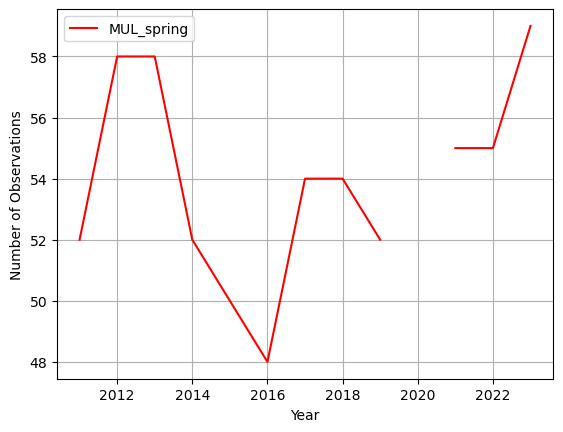

In [23]:
df.plot(x = 'year',
       y= 'MUL_spring',
       xlabel = 'Year',
       ylabel = 'Number of Observations',
       color = 'red',
       grid = True,
       legend = True)

In [24]:
df[pd.isna(df['MUL_spring'])]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


## Check-in

Without running the code, give a step-by-step breakdown of what this code is doing:

`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`

Is this code modifying the data frame df? Why or why not?

Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

<AxesSubplot:xlabel='year'>

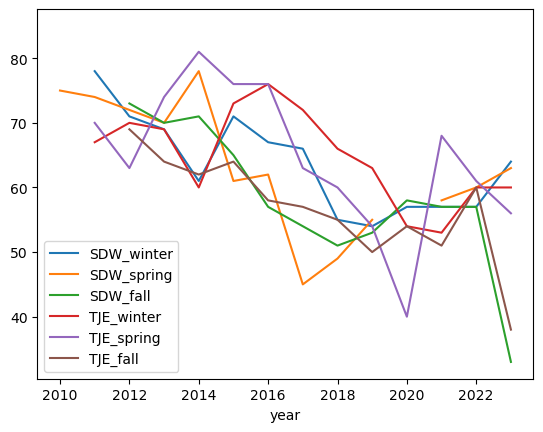

In [25]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()